# **<span style="color: #0098cd;">Comparación de algoritmos de Clustering (K-Means, DBSCAN, Jerárquico)</span>**

## **Objetivos**

El objetivo principal de este proyecto consiste en aplicar y comparar distintos algoritmos de aprendizaje automático no supervisado, concretamente K-Means, Clustering Jerárquico (AgglomerativeClustering) y DBSCAN, sobre un conjunto de datos determinado. 

Para ello, se busca:
- Detectar y tratar outliers de forma automática, antes de realizar el agrupamiento.
- Generar agrupaciones utilizando los métodos indicados (K-Means, Jerárquico y DBSCAN) y analizar la formación de grupos.
- Comparar los resultados mediante métricas y mediante visualizaciones o análisis estadísticos de los clusters obtenidos.
- Concluir cuál de los métodos se adapta mejor al conjunto de datos y a los objetivos de la aplicación.

## **Descripción**

En este proyecto se parte de un dataset del cual se realiza una exploración inicial para comprender su contenido y su estructura. Posteriormente, se lleva a cabo una limpieza y detección de outliers, descartando registros que pudieran sesgar la formación de los clusters.

Se implementan tres algoritmos de clustering:

- K-Means, ajustando el número de clusters y evaluando la calidad de la segmentación.
- DBSCAN, ajustando los parámetros de densidad y analizando la proporción de puntos que se consideran ruido.
- Clustering Jerárquico, probando diferentes métodos de enlace y distintos números de clusters para encontrar la configuración más adecuada.


El conjunto de datos con el que voy a trabajar se encuentra en: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este dataset contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, también contiene una etiqueta de si hay fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

## **Análisis exploratorio de los datos**

#### **Carga del dataset**

In [751]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv', sep=',') # Cargo el dataset

#### **Número de instancias del dataset**

In [752]:
num_instancias = df.shape[0]                            # Número de instancias 
print(f"El dataset tiene {num_instancias} instancias.")

El dataset tiene 944 instancias.


#### **Tipos de datos en el dataset**

In [753]:
tipos_datos = df.dtypes # Tipo de datos de cada columna

tipo_predominante = tipos_datos.value_counts() # Cuento la frecuencia de cada tipo de dato
print(tipo_predominante)

print(70*'_')
print(df.describe()) # Muestro las estadísticas básicas


int64    10
Name: count, dtype: int64
______________________________________________________________________
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.97478

Se observa que el dataset tiene 944 registros y 10 columnas, en las que todos los valores son enteros. Coincide con la información en Kaggle, por lo que está correctamente cargado.

#### **Existencia de variables continuas y categóricas**

In [754]:
print(80*'_')
for column in df.columns:
    print(f"{column}: {df[column].unique()}") # Muestro los valores únicos de cada columna


________________________________________________________________________________
footfall: [   0  190   31   83  640  110  100  180 2800 1600  330 1000  130    5
   33   19   74   12  390   40    3  450  350   64   62   11    4   35
  270   45    6    2 3500   67   30  400   15   22   32   59  170    1
   53   16   27   84  200   20 7300   13    9   44   51   29  630   50
  720   24   55   63   71  900  370  470   47    8  290   10   93  510
   56    7  140   14  310   37   23  360   87   42   70  520   54   75
   34   76  430  150   25   18  740   81  160  220   26   88   66  570
   17]
tempMode: [7 1 4 3 0 5 2 6]
AQ: [7 3 2 5 4 6 1]
USS: [1 3 2 4 6 7 5]
CS: [6 5 4 3 7 2 1]
VOC: [6 1 0 4 3 5 2]
RP: [36 20 24 28 68 21 77 31 39 26 22 42 74 62 58 51 88 27 44 45 40 48 34 60
 32 33 57 84 75 19 47 35 43 76 46 38 69 67 72 37 30 64 59 55 65 73 91 71
 83 53 82 49 56 25 85 70 78 80 79 66 87 52 29 41 23 50 61 63 54 89 81]
IP: [3 4 6 2 5 1 7]
Temperature: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 1

Observando los valores que toman las variables del dataset y su descripción en el mismo, se podría decir que:

- Continuas: Temperature, RP, footfall -----------------> Dado que representan valores númericos en un rango amplio y no categorías
- Categóricas: tempMode, fail, AQ, USS, CS, VOC, IP.  -> Dado que representan categorías, niveles, clasificaciones, etc

#### **Comprobación de valores nulos o faltantes**

In [755]:
datos_faltantes = df.isnull().sum()
print(datos_faltantes)

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


El dataset no cuenta con valores nulos ni faltantes. Es importante que esto sea así, ya que garantiza que los algoritmos de clustering puedan calcular correctamente las distancias entre los datos, evitando sesgos en la agrupación, problemas de convergencia y errores en la detección de patrones, lo que permite obtener resultados más precisos y representativos de la estructura real de los datos.

#### **Eliminación de la variable fail**

In [756]:
df = df.drop(columns=['fail']) # Elimino la variable 'fail'
print(df.head())               # Compruebo que ha sido eliminada

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature
0         0         7   7    1   6    6  36   3            1
1       190         1   3    3   5    1  20   4            1
2        31         7   2    2   6    1  24   6            1
3        83         4   3    4   5    1  28   6            1
4       640         7   5    6   4    0  68   6            1


Es importante eliminar la variable "fail" ya que representa una etiqueta binaria de fallo.

Dado que el objetivo del clustering es descubrir estructuras ocultas en los datos sin conocer previamente las etiquetas, incluir una variable como "fail" podría sesgar el proceso y hacer que el algoritmo agrupe los datos en función de una información que ya clasifica los registros, convirtiendo la tarea en algo más cercano a un problema de clasificación supervisada. Eliminar "fail" permite que el algoritmo agrupe los datos basándose únicamente en las características intrínsecas de las muestras, sin que una variable de resultado condicione el análisis.

#### **Distribución de los datos y test de normalidad**

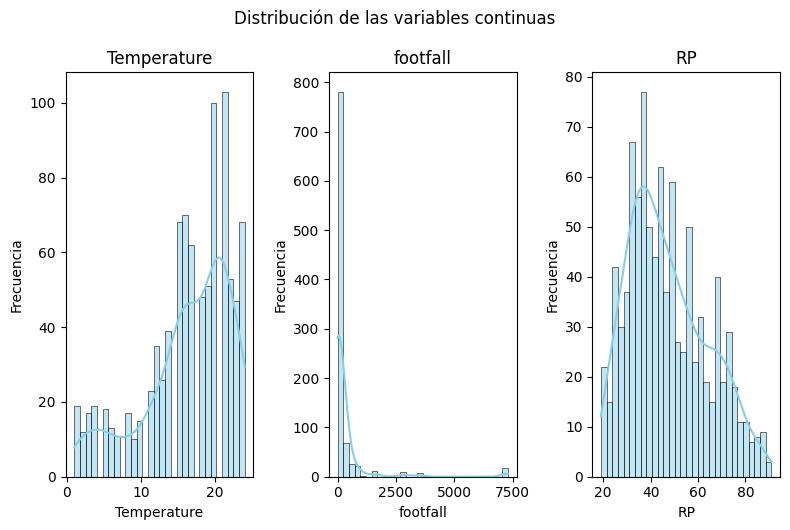

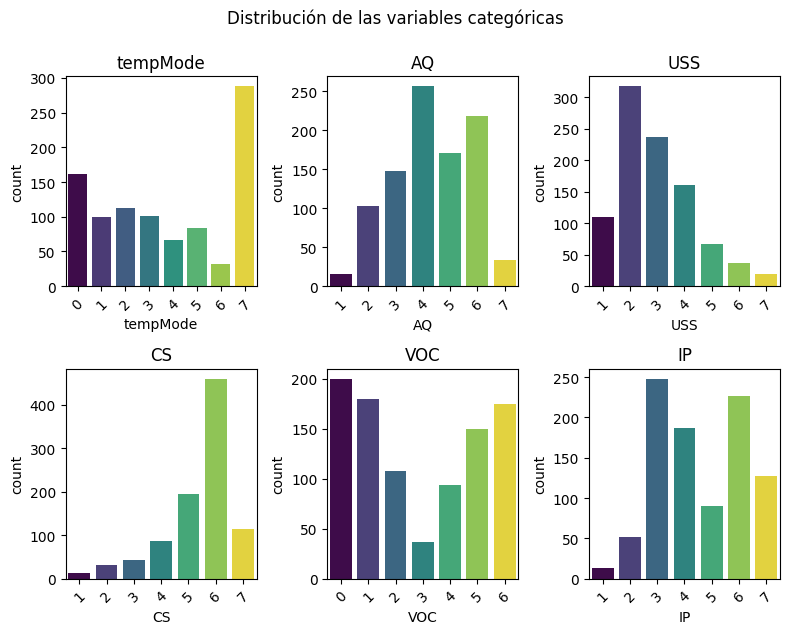

In [757]:
# Variables continuas y categóricas
continuous_vars = ['Temperature', 'footfall', 'RP']
categorical_vars = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP']


# Representación gráfica de variables continuas
plt.figure(figsize=(8, 5))
for i, col in enumerate(continuous_vars, 1): # 
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.suptitle("Distribución de las variables continuas", fontsize=12, y=1.05)
plt.show()


# Representación gráfica de variables categóricas
plt.figure(figsize=(8, 6))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="viridis", legend=False)
    plt.title(f"{col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Distribución de las variables categóricas", fontsize=12, y=1.05)
plt.show()

En las distribuciones de las variables continuas se puede ver que ninguna sigue una distribución normal. La variable footfall está especialmente sesgada con una gran concentración en valores bajos y pocos valores muy altos.

Las variables categóricas tienen distribuciones desiguales. Variables como tempMode y CS tienen categorías con mucha diferencia en frecuencia, lo que puede influir en los resultados del clustering.

In [758]:
from scipy.stats import shapiro 

# Test de Shapiro-Wilk SOLO para variables continuas
print("\n--- Test de Normalidad (Shapiro-Wilk) ---")
for col in continuous_vars:
    stat, p = shapiro(df[col].dropna())  # Aplico el test de Shapiro-Wilk a cada variable continua
    print(f"{col}: p-value = {p:.5f}")

    if p < 0.05:                         # Umbral del 5%
        print(f" → ❌ {col} NO sigue una distribución normal")
    else:
        print(f" → ✅ {col} sigue una distribución normal")


--- Test de Normalidad (Shapiro-Wilk) ---
Temperature: p-value = 0.00000
 → ❌ Temperature NO sigue una distribución normal
footfall: p-value = 0.00000
 → ❌ footfall NO sigue una distribución normal
RP: p-value = 0.00000
 → ❌ RP NO sigue una distribución normal


Aunque con las distribuciones era evidente que las variables no seguían una distribución normal, decidí realizar el test de Shapiro-Wilk para confirmarlo. 

#### **Detección de Outliers**

Dado que las variables continuas no sigue distribuciones normales, usaré el método de rango intercuartílico, que es más robusto para distribuciones sesgadas. 

Si las distribuciones hubieran sido más normales, hubiera utilizado el método de Z-Score.

In [759]:
continuous_vars = ['Temperature', 'footfall', 'RP'] # Selecciono las variables continuas

# Cálculo del IQR
Q1 = df[continuous_vars].quantile(0.25)  # Primer cuartil (25%)
Q3 = df[continuous_vars].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1                            # Rango Intercuartílico

# Definir umbrales para detección de outliers
lower_bound = Q1 - 1.75 * IQR
upper_bound = Q3 + 1.75 * IQR

outliers = (df[continuous_vars] < lower_bound) | (df[continuous_vars] > upper_bound) # Detecto outliers

print("\nNúmero de outliers:")
print(outliers.sum())                 # Muestro el número de outliers por columna

df_no_out = df[~outliers.any(axis=1)] # Elimino filas con outliers

print(f"\nEl dataset tenía {df.shape[0]} instancias y ahora tiene {df_no_out.shape[0]} tras eliminar outliers.")



Número de outliers:
Temperature     19
footfall       141
RP               0
dtype: int64

El dataset tenía 944 instancias y ahora tiene 789 tras eliminar outliers.


#### **Estandarización de los datos**

Estandarizo solo las variables continuas.

In [760]:
from sklearn.preprocessing import StandardScaler

print("\n--- Estandarización ---")

scaler = StandardScaler()
df_cont_scaled = pd.DataFrame(scaler.fit_transform(df_no_out[continuous_vars]), columns=continuous_vars) # Aplico estandarización SOLO a las variables continuas

df_final = pd.concat([df_cont_scaled, df_no_out[categorical_vars].reset_index(drop=True)], axis=1)       # Mantengo las variables categóricas sin cambios

print(df_final.head()) # Muestro las primeras filas del dataset final

# Verifico media y desviación estándar de las variables estandarizadas
print("\nMedia de las variables estandarizadas:\n", df_final[continuous_vars].mean())              # Debe ser ~0
print("\nDesviación estándar de las variables estandarizadas:\n", df_final[continuous_vars].std()) # Debe ser ~1



--- Estandarización ---
   Temperature  footfall        RP  tempMode  AQ  USS  CS  VOC  IP
0    -2.648105 -0.329971 -0.695690         2   2    1   4    0   3
1    -2.648105  0.553378  2.494160         7   4    4   7    2   2
2    -2.648105  2.416441 -1.677183         0   2    4   6    2   4
3    -2.648105 -0.442397 -1.247780         3   4    6   3    2   3
4    -2.648105 -0.635128 -0.204944         7   6    1   6    6   4

Media de las variables estandarizadas:
 Temperature   -7.204489e-17
footfall       0.000000e+00
RP             0.000000e+00
dtype: float64

Desviación estándar de las variables estandarizadas:
 Temperature    1.000634
footfall       1.000634
RP             1.000634
dtype: float64


## **<span style="color: #0098cd;">Algoritmo K-Means</span>**

### **Teoría**

**K-Means** es un algoritmo de clustering no supervisado que busca agrupar datos en K grupos (clusters) basándose en la distancia entre puntos.

<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1200/0*_XwxbKHayTU8QG44.png" alt="Clustering K-Means" width="600">
</p>


**<span style="color:orange;">Funcionamiento</span>**
  1. Se eligen K centroides iniciales (puntos de referencia para los clusters).
  2. Cada punto del dataset se asigna al centroide más cercano.
  3. Se recalculan los centroides como el promedio de los puntos asignados a cada cluster.
  4. Se repiten los pasos 2 y 3 hasta que los centroides dejen de cambiar significativamente.

**<span style="color:green;">Ventajas</span>**
  - Rápido y eficiente con grandes volúmenes de datos.
  - Fácil de interpretar y aplicar.
  - Se escala bien con datos de alta dimensión.

**<span style="color:red;">Desventajas</span>**
  - Debes elegir K manualmente, aunque existen técnicas como el método del codo.
  - Sensible a outliers, ya que pueden distorsionar los centroides.
  - No funciona bien si los clusters no tienen una forma esférica o si los tamaños de los clusters son muy diferentes.

A continuación, entrenaré 10 modelos de KMeans y se hará uso del método del codo para elegir una K adecuada.

### **Método del codo**


--- Entrenamiento de modelos K-Means ---
K=1: Inercia = 2367.00
K=2: Inercia = 1718.05
K=3: Inercia = 1181.91
K=4: Inercia = 895.15
K=5: Inercia = 739.94
K=6: Inercia = 641.90
K=7: Inercia = 576.81
K=8: Inercia = 521.59
K=9: Inercia = 471.94
K=10: Inercia = 430.38


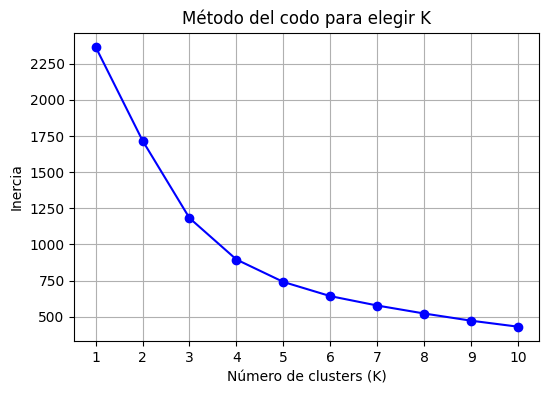

In [761]:
from sklearn.cluster import KMeans

# Definir rango de valores de K (número de clusters)
k_values = range(1, 11)  # Pruebo de 1 a 10 clusters
inercias = []            # Lista para almacenar la inercia de cada modelo

print("\n--- Entrenamiento de modelos K-Means ---")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7, n_init=10)  # Creo el modelo K-Means con K clusters y 10 inicializaciones aleatorias distintas
    kmeans.fit(df_final[continuous_vars])                     # Entreno SOLO con variables continuas
    inercias.append(kmeans.inertia_)                          # Guardo la inercia
    
    print(f"K={k}: Inercia = {kmeans.inertia_:.2f}")

# Gráfico del método del codo para elegir K
plt.figure(figsize=(6, 4))
plt.plot(k_values, inercias, marker='o', linestyle='-', color='b')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo para elegir K")
plt.xticks(k_values)
plt.grid()
plt.show()

El **método del codo** proporciona un valor orientativo sobre la K más adecuada para el modelo, ésta se elige observando el punto donde la reducción de la inercia empieza a desacelerarse notablemente (donde se forma el codo en la gráfica).

- De K=1 a K=3: Hay una gran reducción de la inercia.
- De K=3 a K=5: Sigue bajando rápido, pero la reducción es menor.
- De K=5 en adelante: La reducción es más lenta, lo que indica que agregar más clusters no aporta tanta mejora.

Por lo tanto, un valor alrededor de K=4 o K=5 puede ser una buena opción en este caso.

### **Silhouette Score**

A continuación, realizaré una comparación entre los valores de K de 3 a 6 haciendo uso de la puntuación de la silueta (Silhouette Score) para determinar el que da una mejor separación de los clusters.

**Silhouette Score**: Evalúa la calidad del clustering midiendo cómo de cerca están los puntos de su propio cluster en comparación con los clusters vecinos.

Valores posibles:
- Cercano a 1 → Clusters bien definidos y separados.
- Cercano a 0 → Clusters solapados o poco diferenciados.
- Negativo → Mal agrupamiento (puntos asignados al cluster equivocado).

Cuanto mayor sea la silhouette score, mejor es la agrupación.


--- Comparación de Silhouette Score ---
K=3: Silhouette Score = 0.3935
K=4: Silhouette Score = 0.3639
K=5: Silhouette Score = 0.3121
K=6: Silhouette Score = 0.3099


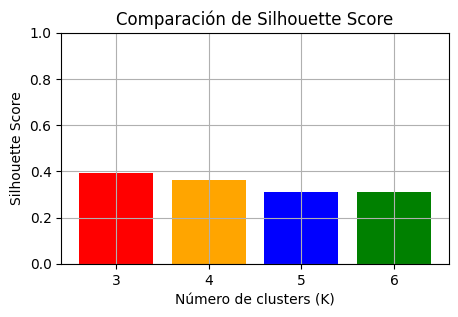

In [762]:
from sklearn.metrics import silhouette_score

k_values_to_compare = [3, 4, 5, 6] # Defino los valores de K a comparar
silhouette_scores = {}             # Diccionario para almacenar los silhouette scores

print("\n--- Comparación de Silhouette Score ---")
for k in k_values_to_compare:
    kmeans = KMeans(n_clusters=k, random_state=7, n_init=10)             # Creo el modelo
    cluster_labels = kmeans.fit_predict(df_final[continuous_vars])       # Entreno y lanzo las predicciones de los clusters
    score = silhouette_score(df_final[continuous_vars], cluster_labels)  # Calculo el Silhouette Score
    silhouette_scores[k] = score                                         # Guardo el Silhouette Score
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Visualización de la comparación
plt.figure(figsize=(5, 3))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['red', 'orange', 'blue', 'green'])
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Comparación de Silhouette Score")
plt.xticks([3, 4, 5, 6])
plt.ylim(0, 1)  # El silhouette score está entre -1 y 1
plt.grid()
plt.show()


El Silhouette Score más alto se obtiene con K=3, por lo que este será el valor que elegiré para entrenar el algoritmo.

### **Entrenamiento de K-Means**

In [763]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=7, n_init=10)           # Creo el modelo K-Means con K=3 clusters y 10 inicializaciones aleatorias distintas
df_final['Cluster KMeans'] = kmeans.fit_predict(df_final[continuous_vars])  # Agrego la columna de clusters

In [764]:
# Calculo las medias de cada cluster
cluster_means = df_final.groupby('Cluster KMeans')[continuous_vars].mean()
print("\nMedia de cada variable en cada cluster:")
print(cluster_means)

print(80*'_')
print(df_final.head()) # Muestro las primeras filas con los clusters asignados


Media de cada variable en cada cluster:
                Temperature  footfall        RP
Cluster KMeans                                 
0                 -0.024935  2.420133 -0.212700
1                  0.461008 -0.313090 -0.379585
2                 -1.055305 -0.269515  0.964629
________________________________________________________________________________
   Temperature  footfall        RP  tempMode  AQ  USS  CS  VOC  IP  \
0    -2.648105 -0.329971 -0.695690         2   2    1   4    0   3   
1    -2.648105  0.553378  2.494160         7   4    4   7    2   2   
2    -2.648105  2.416441 -1.677183         0   2    4   6    2   4   
3    -2.648105 -0.442397 -1.247780         3   4    6   3    2   3   
4    -2.648105 -0.635128 -0.204944         7   6    1   6    6   4   

   Cluster KMeans  
0               2  
1               2  
2               0  
3               2  
4               2  


### **Representación de resultados**

In [765]:
from sklearn.decomposition import PCA

# Reducción de dimensiones con PCA para visualización en 2D
pca = PCA(n_components=2)
df_final_pca = pca.fit_transform(df_final[continuous_vars])

# Añado componentes PCA al DataFrame
df_final['PCA1'] = df_final_pca[:, 0]
df_final['PCA2'] = df_final_pca[:, 1]

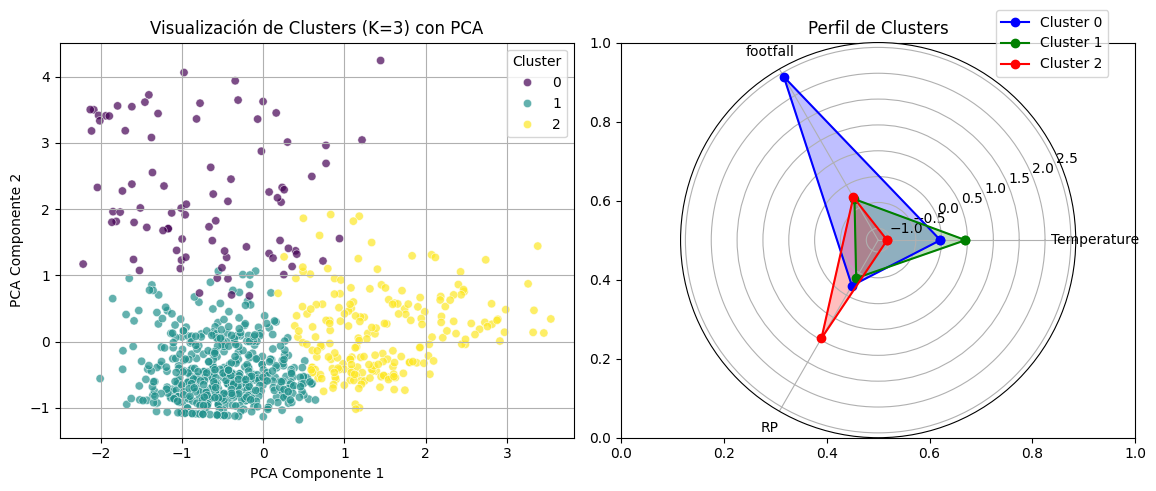

<Figure size 640x480 with 0 Axes>

In [ ]:
# 🔹 Configuración de subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Creo 2 subplots: 1 normal y 1 polar

# GRÁFICO 1: Clusters en 2D con PCA
sns.scatterplot(ax=axes[0], x=df_final['PCA1'], y=df_final['PCA2'], hue=df_final['Cluster KMeans'], palette="viridis", alpha=0.7)
axes[0].set_xlabel("PCA Componente 1")
axes[0].set_ylabel("PCA Componente 2")
axes[0].set_title("Visualización de Clusters (K=3) con PCA")
axes[0].legend(title="Cluster")
axes[0].grid()


# GRÁFICO 2: Perfil de Clusters en gráfico polar
categories = continuous_vars
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Cierro la forma en el gráfico

ax_polar = fig.add_subplot(122, polar=True)  # Creo el segundo subplot como gráfico polar

colors = ['b', 'g', 'r']
for i, (index, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]  # Cierro la forma en el gráfico
    ax_polar.plot(angles, values, marker='o', label=f'Cluster {index}', color=colors[i])
    ax_polar.fill(angles, values, alpha=0.25, color=colors[i])

# Configuración del gráfico polar
ax_polar.set_xticks(angles[:-1])
ax_polar.set_xticklabels(categories)
ax_polar.set_title("Perfil de Clusters")
ax_polar.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


# Muestro ambos gráficos juntos
plt.tight_layout()
plt.show()

## **<span style="color: #0098cd;">Algoritmo DBSCAN</span>**

### **Teoría**

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering no supervisado que agrupa puntos basándose en la densidad de datos en lugar de usar centroides como K-Means.

Es especialmente útil cuando los clusters tienen formas irregulares o cuando los datos contienen ruido (outliers).

<p align="center">
    <img src="https://www.researchgate.net/publication/342141592/figure/fig4/AS:901775972380681@1592011554293/An-Example-Illustrating-the-Density-Based-DBSCAN-Clustering-Method-Applied-to-SMLM-Data.png" alt="Clustering K-Means" width="700">
</p>


**<span style="color:orange;">Funcionamiento</span>**
  1. Se define un radio ε (épsilon, eps), que representa la distancia máxima entre puntos vecinos, y un número mínimo de puntos necesarios para formar un cluster, min_samples.
  2. Se selecciona un punto aleatorio:
      - Si tiene al menos min_samples vecinos dentro de eps, se convierte en un punto central y se forma un nuevo cluster.
      - Si no tiene suficientes vecinos, se marca como punto ruido (outlier).
  3. Los puntos vecinos de un centro se expanden en el cluster si cumplen el criterio de densidad (eps y min_samples).
  4. Se repiten los pasos hasta agrupar todos los puntos o marcarlos como ruido.

**<span style="color:green;">Ventajas</span>**
  - No necesita especificar el número de clusters (K) como en K-Means.
  - Detecta outliers automáticamente, ya que los puntos aislados se marcan como ruido.
  - Puede detectar clusters con formas irregulares y de diferentes tamaños, algo que K-Means no hace bien.
  - Es robusto frente a ruido y valores atípicos, lo que lo hace perfecto para datos con dispersión.

**<span style="color:red;">Desventajas</span>**
  - La elección de eps y min_samples es muy importante, y puede ser difícil encontrar los valores óptimos.
  - No funciona bien en datos de alta dimensión, ya que la distancia euclidiana pierde significado.
  - No es bueno cuando los clusters tienen densidades muy diferentes, porque podría fusionarlos o separarlos incorrectamente.
  - Puede fallar en datasets muy grandes, ya que su complejidad es mayor que K-Means en algunos casos.

### **Búsqueda de hiperparámetros**

Probaré diferentes valores de eps:
- Un valor muy pequeño generará demasiados clusters pequeños.
- Un valor muy grande agrupará demasiados puntos en un solo cluster.

Probaré diferentes valores de min_samples:
- Un valor pequeño incluirá más puntos en clusters.
- Un valor grande puede dejar demasiados puntos como ruido.


Evaluaré el rendimiento usando de nuevo la métrica Silhouette Score, que mide cómo de bien están separados los clusters.

In [767]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.25, 1, 0.05)  # Rango de valores para epsilon
min_samples_values = range(1, 10, 1)   # Rango de valores para min_samples

# Variables de almacenamiento
best_score = -1
best_params = (None, None)
best_n_clusters = 0
best_n_noise = 0

# Búsqueda de hiperparámetros óptimos
for eps in eps_values:
    for min_samp in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)         # Creo el modelo DBSCAN con los parámetros
        labels = dbscan.fit_predict(df_final[continuous_vars]) # Entreno y lanzo las predicciones

        unique_labels = set(labels)            # Etiquetas incluyendo el ruido
        n_clusters = len(unique_labels - {-1}) # Clusters "reales" (excluyo ruido)
        n_noise = sum(labels == -1)            # Número de puntos marcados como ruido

        # Calculo silueta solo si hay 2 o más clusters
        score = -1
        if n_clusters > 1:
            if -1 in unique_labels:                                                     # Si hay ruido
                mask = labels != -1                                                     # Máscara para filtrar ruido
                score = silhouette_score(df_final[continuous_vars][mask], labels[mask]) # Calculo silueta sin ruido
            else:
                score = silhouette_score(df_final[continuous_vars], labels)             # Calculo silueta con ruido

        print(f"eps={eps:.2f}, min_samples={min_samp} → Silueta={score:.4f}, Clusters={n_clusters}, Ruido={n_noise}") # Imprimo el resultado de la combinación

        # Actualizo los mejores parámetros si encuentro uno con mejor silueta
        if score > best_score:
            best_score = score
            best_params = (eps, min_samp)
            best_n_clusters = n_clusters
            best_n_noise = n_noise

print()
print(
    f"Mejor Silhouette Score = {best_score:.4f} con eps={best_params[0]} y "
    f"min_samples={best_params[1]}, Ruido={best_n_noise}. Se forman {best_n_clusters} clusters."
)

eps=0.25, min_samples=1 → Silueta=-0.2144, Clusters=226, Ruido=0
eps=0.25, min_samples=2 → Silueta=-0.1668, Clusters=60, Ruido=166
eps=0.25, min_samples=3 → Silueta=-0.2314, Clusters=30, Ruido=226
eps=0.25, min_samples=4 → Silueta=-0.2024, Clusters=10, Ruido=304
eps=0.25, min_samples=5 → Silueta=-0.1793, Clusters=5, Ruido=353
eps=0.25, min_samples=6 → Silueta=0.1102, Clusters=3, Ruido=384
eps=0.25, min_samples=7 → Silueta=0.0728, Clusters=4, Ruido=396
eps=0.25, min_samples=8 → Silueta=0.1637, Clusters=3, Ruido=422
eps=0.25, min_samples=9 → Silueta=0.2238, Clusters=3, Ruido=450
eps=0.30, min_samples=1 → Silueta=-0.1934, Clusters=180, Ruido=0
eps=0.30, min_samples=2 → Silueta=-0.1439, Clusters=53, Ruido=127
eps=0.30, min_samples=3 → Silueta=-0.1525, Clusters=27, Ruido=179
eps=0.30, min_samples=4 → Silueta=-0.1879, Clusters=16, Ruido=229
eps=0.30, min_samples=5 → Silueta=0.4774, Clusters=4, Ruido=287
eps=0.30, min_samples=6 → Silueta=0.1350, Clusters=2, Ruido=312
eps=0.30, min_samples=7 →

### **Entrenamiento de DBSCAN**

In [768]:
dbscan_final = DBSCAN(eps=best_params[0], min_samples=best_params[1])  # Creo el modelo con los parámetros óptimos
labels_dbscan = dbscan_final.fit_predict(df_final[continuous_vars])    # Ajustas y obtienes las etiquetas de cluster
df_final['Cluster_DBSCAN'] = labels_dbscan                             # Añado la columna con la etiqueta de cada punto

### **Representación de resultados**

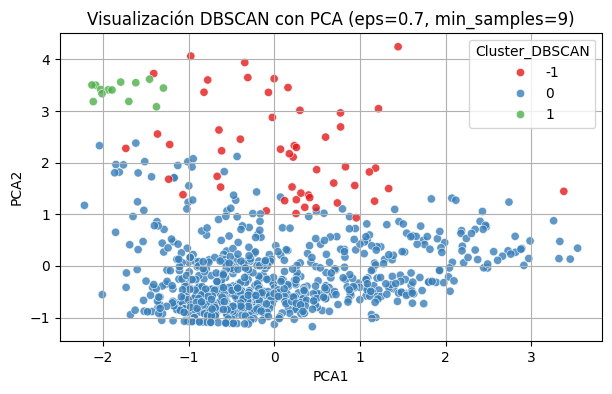

In [769]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_final[continuous_vars])

# Añado las columnas PCA al DataFrame
df_final['PCA1'] = X_pca[:, 0]
df_final['PCA2'] = X_pca[:, 1]

# Dibujo un scatterplot, coloreando cada punto según su cluster
plt.figure(figsize=(7,4))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster_DBSCAN',
    data=df_final, 
    palette='Set1',
    alpha=0.8
)
plt.title("Visualización DBSCAN con PCA (eps=0.7, min_samples=9)")
plt.grid()
plt.show()

## **<span style="color: #0098cd;">Algoritmo Clustering Jerárquico</span>**

### **Teoría**

**Clustering Jerárquico** es un método de clustering que organiza los datos en una estructura jerárquica en forma de árbol. No es necesario especificar el número de clusters de antemano, ya que se pueden obtener en diferentes niveles de la jerarquía.

Existen dos enfoques principales:
- **Aglomerativo (Bottom-Up)** → Se usa más comúnmente y es el que implementaré.
- **Divisivo (Top-Down)** → Menos utilizado, pero sigue la dirección inversa.

<p align="center">
    <img src="https://www.diegocalvo.es/wp-content/uploads/2018/03/cluster-jer%C3%A1rquico-vs-cluster-no-jer%C3%A1rquico.png" alt="Clustering K-Means" width="600">
</p>


**<span style="color:orange;">Funcionamiento del Clustering Jerárquico (Aglomerativo)</span>**
  1. Cada punto comienza como un cluster individual.
  2. Se calculan las distancias entre clusters (según el criterio de enlace).
  3. Se fusionan los clusters más cercanos, reduciendo el número total de clusters.
  4. El proceso se repite hasta que todos los puntos pertenecen a un solo cluster o se alcanza el número deseado de clusters.
  5. Se construye un dendrograma, que permite visualizar cómo se agruparon los puntos y decidir el número óptimo de clusters.

<br>

**<span style="color:orange;">Tipos de enlace (Linkage) en Clustering Jerárquico</span>**

La forma en que se mide la distancia entre clusters afecta los resultados. Los métodos más comunes son:

- Single Linkage (Enlace simple):
  - La distancia entre clusters se basa en la menor distancia entre dos puntos.
  - Puede generar clusters alargados y conectados.
  - Sensible a outliers.

- Complete Linkage (Enlace completo):
  - La distancia entre clusters se mide por la mayor distancia entre dos puntos.
  - Tiende a crear clusters compactos y bien separados.
  - Menos sensible a outliers que Single Linkage.

- Average Linkage (Enlace promedio):
  - La distancia entre clusters se calcula como el promedio de todas las distancias entre los puntos de ambos clusters.
  - Un equilibrio entre Single y Complete Linkage.

- Ward Linkage (Enlace de Ward):
  - Minimiza la varianza dentro de cada cluster.
  - Muy efectivo para encontrar clusters compactos.
  - Es el más utilizado por su buena estabilidad.


**<span style="color:green;">Ventajas</span>**
  - No requiere definir el número de clusters K previamente, ya que se pueden explorar diferentes cortes en el dendrograma.
  - Funciona bien con datos pequeños y medianos, donde la estructura jerárquica es útil.
  - El dendrograma ayuda a entender la relación entre los datos, permitiendo una interpretación visual clara.
  - No depende de una inicialización aleatoria, como K-Means, por lo que los resultados son consistentes.

**<span style="color:red;">Desventajas</span>**
  - No escala bien con datasets grandes, ya que su complejidad es O(n²) o peor, lo que lo hace lento en grandes volúmenes de datos.
  - Es sensible a outliers, especialmente con Single Linkage.
  - No puede reasignar puntos a otro cluster, como K-Means o DBSCAN.
  - El rendimiento depende del tipo de enlace elegido, lo que puede hacer que los resultados varíen bastante.

### **Búsqueda de hiperparámetros**

In [770]:
from sklearn.cluster import AgglomerativeClustering

n_clusters_range = range(2, 10)                   # Rango de posibles números de clusters
linkage_methods = ['ward', 'complete', 'average'] # Distintos métodos de linkage a probar

# Variables de almacenamiento
best_score = -1
best_n_clusters = 0
best_method = None

for method in linkage_methods:
    for n_clusters in n_clusters_range:
        
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=method) # Creo el modelo jerárquico con n_clusters y el método de enlace
        labels = agglo.fit_predict(df_final[continuous_vars])

        score = silhouette_score(df_final[continuous_vars], labels)  # Calculo silueta
        print(f"linkage={method}, n_clusters={n_clusters}, silhouette={score:.4f}")

        # Actualizo los mejores si encuentro uno con mejor silueta
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_method = method

print()
print(f"Mejor Silhouette Score: {best_score:.4f} con n_clusters={best_n_clusters}, linkage='{best_method}'.")


linkage=ward, n_clusters=2, silhouette=0.4569
linkage=ward, n_clusters=3, silhouette=0.3937
linkage=ward, n_clusters=4, silhouette=0.2573
linkage=ward, n_clusters=5, silhouette=0.2589
linkage=ward, n_clusters=6, silhouette=0.2761
linkage=ward, n_clusters=7, silhouette=0.2534
linkage=ward, n_clusters=8, silhouette=0.2635
linkage=ward, n_clusters=9, silhouette=0.2585
linkage=complete, n_clusters=2, silhouette=0.2752
linkage=complete, n_clusters=3, silhouette=0.2970
linkage=complete, n_clusters=4, silhouette=0.3143
linkage=complete, n_clusters=5, silhouette=0.2761
linkage=complete, n_clusters=6, silhouette=0.3027
linkage=complete, n_clusters=7, silhouette=0.3036
linkage=complete, n_clusters=8, silhouette=0.3009
linkage=complete, n_clusters=9, silhouette=0.2938
linkage=average, n_clusters=2, silhouette=0.4626
linkage=average, n_clusters=3, silhouette=0.4441
linkage=average, n_clusters=4, silhouette=0.3443
linkage=average, n_clusters=5, silhouette=0.3369
linkage=average, n_clusters=6, silho

### **Entrenamiento**

In [771]:
agglo_final = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_method) # Creo el modelo con los parámetros óptimos
labels_hc = agglo_final.fit_predict(df_final[continuous_vars])                         # Entreno y obtengo las etiquetas de cluster
df_final['Cluster_HC'] = labels_hc                                                     # Añado la columna con la etiqueta de cada punto

### **Representación de resultados con Dendograma**

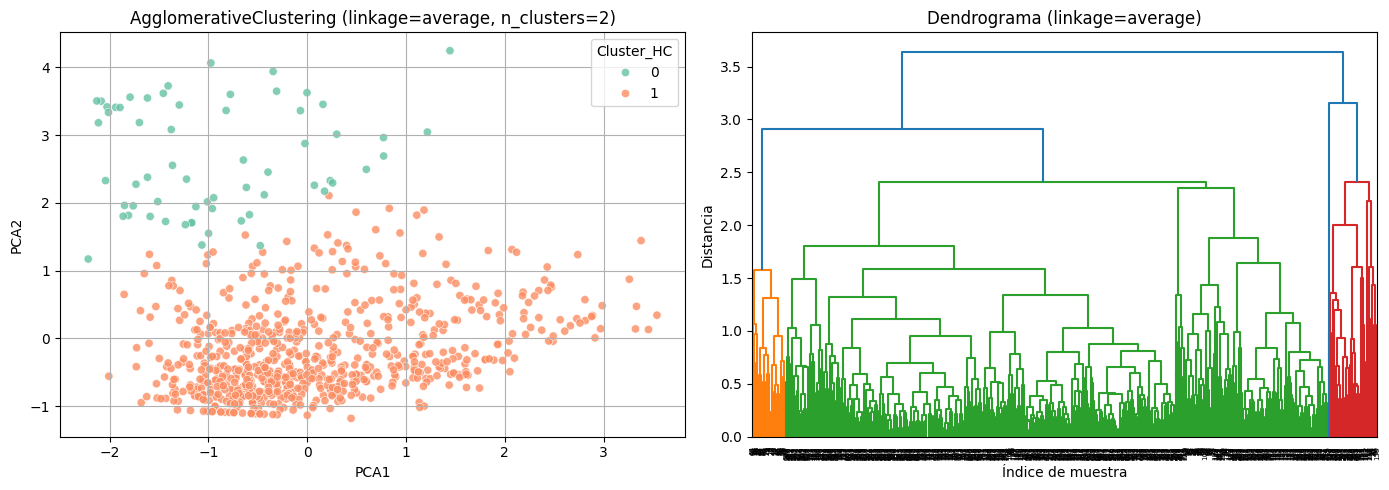

In [772]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Reducción de dimensiones con PCA para visualización en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_final[continuous_vars])

# Añado componentes PCA al DataFrame
df_final['PCA1'] = X_pca[:, 0]
df_final['PCA2'] = X_pca[:, 1]

Z = linkage(df_final[continuous_vars], method=best_method) # Aplico Clustering Jerárquico (Agglomerative)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))            # Creo la figura con 2 subplots: Scatter plot + Dendrograma

# GRÁFICO 1: Scatter plot con PCA
sns.scatterplot(
    ax=axes[0], 
    x='PCA1', 
    y='PCA2', 
    hue='Cluster_HC',
    data=df_final,
    palette='Set2',
    alpha=0.8
)
axes[0].set_title(f"AgglomerativeClustering (linkage={best_method}, n_clusters={best_n_clusters})")
axes[0].grid()

# GRÁFICO 2: Dendrograma
dendrogram(Z, ax=axes[1])
axes[1].set_title(f"Dendrograma (linkage={best_method})")
axes[1].set_xlabel("Índice de muestra")
axes[1].set_ylabel("Distancia")

# Muestro ambos gráficos juntos
plt.tight_layout()
plt.show()


## **Comparativa de algoritmos**

### **<span style="color:orange;">K-Means</span>**

Para K-Means se obtuvo un Silhouette Score de 0.39 (el mayor en la comparativa de K=3 a 6).

Visualmente: 
- El cluster turquesa (1) agrupa la mayoría de puntos a la izquierda–abajo.
- El cluster amarillo (2) se ubica más a la derecha.
- El cluster morado (0) queda arriba/izquierda.

Observando las medias: 
- Cluster 0: Destaca por footfall muy elevado (2.42) frente a la media, y Temperature y  RP alrededor de valores más neutrales o ligeramente negativos.
- Cluster 1: Destaca por Temperature positiva, pero footfall y RP algo negativos.
- Cluster 2: destaca por Temperature muy negativa y RP muy positiva.

En K-Means se ha obtenido una partición algo más fina (3 grupos), pero el valor de silueta (0.39) no es tan alto como el que se ve luego en DBSCAN.

### **<span style="color:green;">DBSCAN</span>**

Para DBSCAN con unos hiperparámetros de eps=0.7 y min_samples=9, se obtuvo un Silhouette Score de 0.56, el más alto de todas las pruebas.

En cuanto a su distribución se forman 2 clusters (0 y 1) y 52 instancias marcadas como ruido (−1).
- Un cluster claramente mayoritario (azul) y otro más pequeño (verde).
- En rojo se indican los puntos que DBSCAN considera atípicos (no cumplen la densidad mínima).

La alta silueta se debe a que cada cluster está muy bien definido y lejos uno de otro en el espacio PCA. Se sacrifica parte de las muestras (un 6-7%) como “outliers” para conseguir esa gran separación.

### **<span style="color:red;">Clustering Jerárquico</span>**

Para el Clustering Jerárquico con 2 clusters y linkage='average' se obtuvo un Silhouette Score de ~0.46.

En cuanto a su distribución se ven 2 grandes grupos: uno mayoritario (naranja) y otro más reducido (verde).
El dendrograma confirma que a la altura ~3.5 se separan esas dos ramas principales.

Comparado con DBSCAN:
La silueta es menor que el 0.56 de DBSCAN, pero sigue siendo buena separación sin etiquetar a nadie como “ruido”. Si cortase más abajo en el dendrograma, obtendría más grupos, pero la silueta empeoraría.

### **Conclusiones**

Dado que este proyecto se centraba en realizar una comparativa de los distintos algoritmos sin un fin determinado, la elección del mejor algoritmo dependerá del objetivo que se busque conseguir.

- Si el objetivo principal es la máxima separación entre clusters, DBSCAN (con eps=0.7 y min_samples=9) ofrece el mejor Silhouette Score (0.56). Sin embargo, implica asumir que un pequeño porcentaje de instancias (52) se consideren outliers.

- Si se prefiere conservar todas las observaciones y obtener una segmentación simple, el Clustering Jerárquico con average linkage y 2 clusters es razonable (Silhouette ~0.46), aunque solo distingue  dos grandes grupos.

- Si se requiere una partición más detallada y una silueta algo menor no es muy relevante, K-Means con K=3 es la opción adecuada (Silhouette ~0.39). Se obtienen clusters con interpretaciones diferenciadas.

En definitiva, “el mejor método” depende del propósito:

- Máxima cohesión–separación y detección de outliers: DBSCAN.
- Segmentación clara en 2 segmentos (sin ruido): Jerárquico con linkage='average'.
- Tres clusters interpretables cuando la métrica no es la prioridad: K-Means con K=3.